# Regularized logistic regression
Created by Quan on 2019/1/8.  

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
path = 'ex2data2.txt'
data = pd.read_csv(path, names=['Test1', 'Test2', 'Accepted'])
data.describe()

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


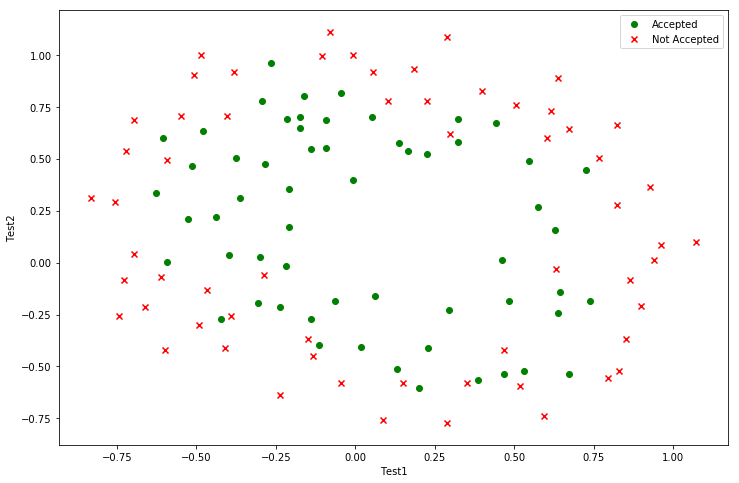

In [15]:
positive = data[data['Accepted'] == 1]
negative = data[data['Accepted'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Test1'], positive['Test2'], c='g', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], c='r', marker='x', label='Not Accepted')
ax.legend()
ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
plt.show()

In [16]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in range(power + 1):
        for p in range(i + 1):
            data['f{}{}'.format(i - p, p)] = np.power(x1, i - p) * np.power(x2, p)
    return pd.DataFrame(data)

In [17]:
X = feature_mapping(data['Test1'].values, data['Test2'].values, 6)
X = X.values
y = data['Accepted'].values
theta = np.zeros(X.shape[1])
X.shape, y.shape, theta.shape

((118, 28), (118,), (28,))

In [18]:
# theta should be a vector for correct running of regularized_cost()
def hypothesis(X, theta):
    h = 1 / (1 + np.exp(-(X @ theta)))
    return h

In [19]:
def cost(theta, X, y):
    m = len(X)
    h = hypothesis(X, theta)
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

In [20]:
def regularized_cost(theta, X, y, l=1):
    m = len(X)
    # theta is a vector
    theta_j1_to_jn = theta[1:]
    regularized_term = (l / (2 * m)) * np.sum(theta_j1_to_jn ** 2)
    return cost(theta, X, y) + regularized_term

In [21]:
def gradient(theta, X, y):
    m = len(X)
    g = (hypothesis(X, theta) - y).T @ X / m
    return g

In [22]:
def regularized_gradient(theta, X, y, l=1):
    m = len(X)
    theta_j1_to_jn = theta[1:]
    regularized_term = np.concatenate((np.array([0]), l / m * theta_j1_to_jn))
    return gradient(theta, X, y) + regularized_term

In [23]:
def predict(X, theta):
    new_y = np.round(hypothesis(X, theta))
    accuracy = 1 - np.mean(np.abs(new_y - y))
    print('accuracy: {}%'.format(accuracy * 100))

In [24]:
import scipy.optimize as opt

In [25]:
l = 1
res = opt.minimize(regularized_cost, theta, args=(X, y, l), method='Newton-CG', jac=regularized_gradient)
final_theta = res.x

In [26]:
predict(X, final_theta)

accuracy: 83.05084745762711%


## 寻找决策边界

In [27]:
import seaborn as sns

In [28]:
def draw_decision_boudary(power, l, data):
    density = 1000
    threshold = 1e-3
    
    final_theta, training_set_X = feature_mapped_logistic_regression(power, l, data)
    x, y = find_decision_boundary(data, density, power, final_theta, threshold)
    sns.lmplot('Test1', 'Test2', data, hue='Accepted', fit_reg=False)
    plt.scatter(x, y, c='r', s=5)
    plt.title('Decision boundary')
    plt.show()
    predict(training_set_X, final_theta)

In [29]:
def feature_mapped_logistic_regression(power, l, data):
    x1 = data.Test1.values
    x2 = data.Test2.values
    y = data.Accepted.values
    X = feature_mapping(x1, x2, power).values
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(regularized_cost, theta, args=(X, y, l), method='TNC', jac=regularized_gradient)
    final_theta = res.x
    
    return final_theta, X

In [30]:
def find_decision_boundary(data, density, power, theta, threshold):
    t1 = np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max(), density)
    t2 = np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max(), density)
    
    coordinates = [(x, y) for x in t1 for y in t2]
    x_coord, y_coord = zip(*coordinates)
    mapped_coordinates = feature_mapping(x_coord, y_coord, power)
    z = mapped_coordinates.values @ theta
    decision_boundary = mapped_coordinates[np.abs(z) < threshold]
    return decision_boundary.f10, decision_boundary.f01

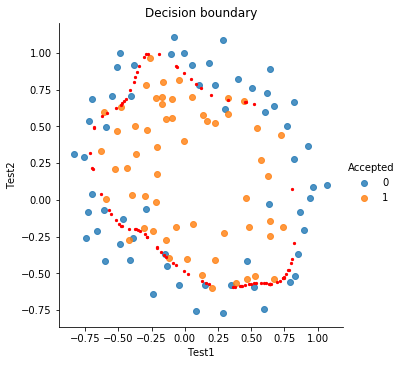

accuracy: 87.28813559322035%


In [31]:
draw_decision_boudary(6, 0, data)

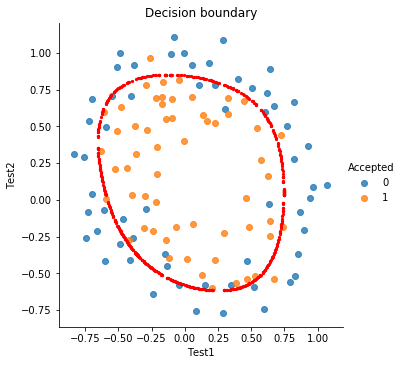

accuracy: 83.05084745762711%


In [32]:
draw_decision_boudary(6, 1, data)

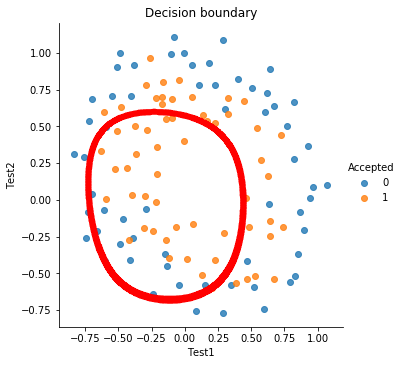

accuracy: 61.01694915254237%


In [33]:
draw_decision_boudary(6, 100, data)